In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_big = cv2.cvtColor(cv2.imread('../../data/dog_backpack.png'),cv2.COLOR_BGR2RGB)
img_small = cv2.cvtColor(cv2.imread('../../data/watermark_no_copy.png'),cv2.COLOR_BGR2RGB)
# plt.imshow(img_big)
img_big.shape

(1401, 934, 3)

In [4]:
img_big3 = img_big.copy()
img_small3 = img_small.copy()
img_small3 = cv2.resize(img_small3, (600, 600))
img_small3.shape

(600, 600, 3)

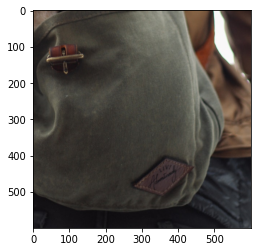

In [11]:
# create ROI on big image
y_offset = img_big3.shape[0]-img_small3.shape[0]
x_offset = img_big3.shape[1]-img_small3.shape[1]
roi = img_big3[y_offset:img_big3.shape[0],x_offset:img_big3.shape[1]]
plt.imshow(roi)

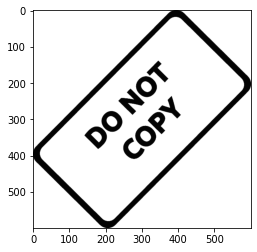

In [14]:
# Convert imposed image to grayscale
img_small3_grey = cv2.cvtColor(img_small3,cv2.COLOR_RGB2GRAY)
plt.imshow(img_small3_grey,cmap='gray')

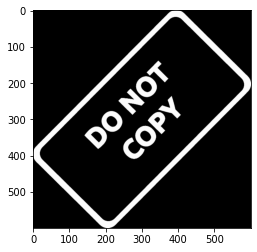

In [18]:
# Calculate inverse (negative) of this image
mask_inv = cv2.bitwise_not(img_small3_grey)
plt.imshow(mask_inv, cmap='gray')

In [21]:
white_background = np.full(img_small3.shape,255,dtype=np.uint8)
white_background.shape

(600, 600, 3)

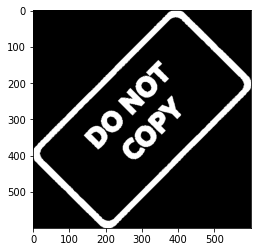

In [24]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)
plt.imshow(bk)

In [25]:
bk.shape

(600, 600, 3)

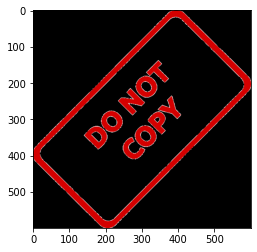

In [28]:
fg = cv2.bitwise_or(img_small3,img_small3,mask=mask_inv)
plt.imshow(fg)

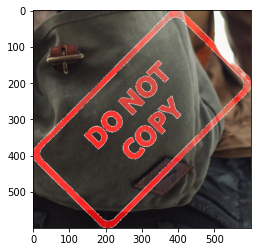

In [31]:
final_image = cv2.bitwise_or(roi,fg)
plt.imshow(final_image)

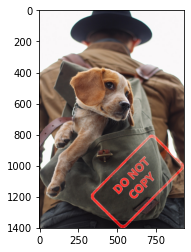

In [33]:
img_big3[y_offset:img_big3.shape[0],x_offset:img_big3.shape[1]] = final_image
plt.imshow(img_big3)